In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
data = pd.read_csv('HRXYZ Data.csv') 

In [3]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,8,2,9.0,2,6,0,4,4.0,1.0,3.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [5]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000


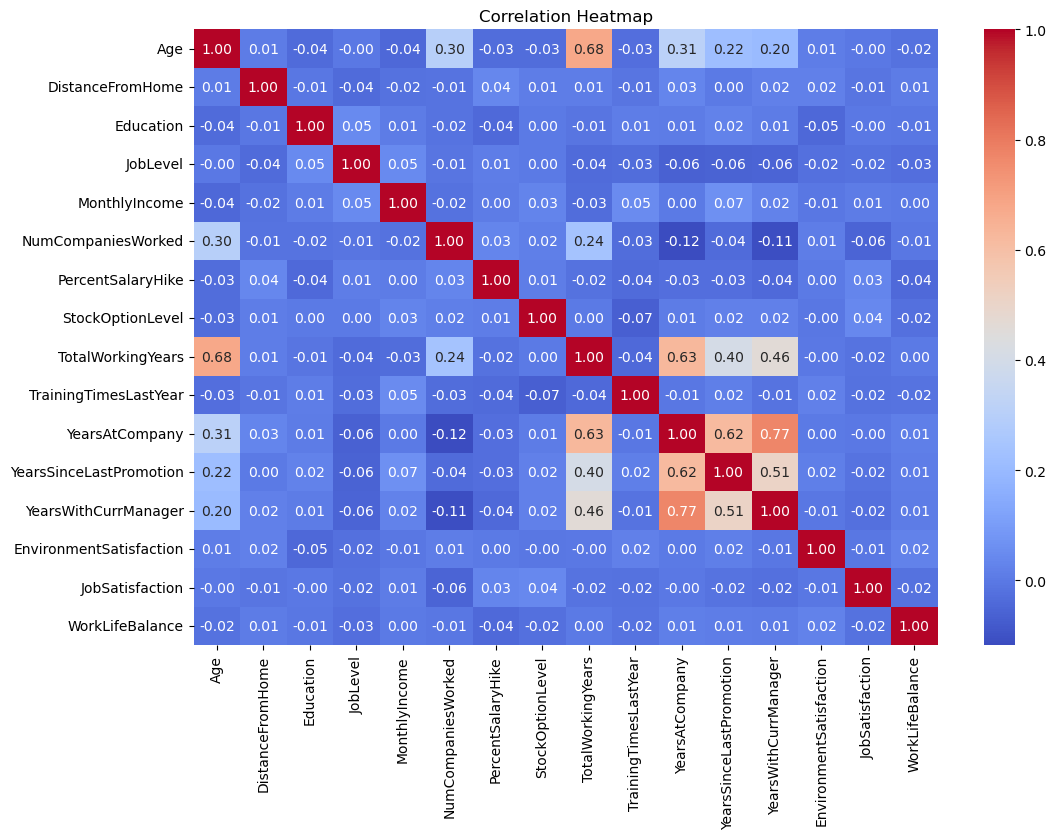

In [6]:
#Playing around with the data to understand it better

# Drop unnecessary columns like 'EmployeeID' and 'Over18'
data.drop(['EmployeeID', 'Over18', 'EmployeeCount','StandardHours'], axis=1, inplace=True)

# 1. Features correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

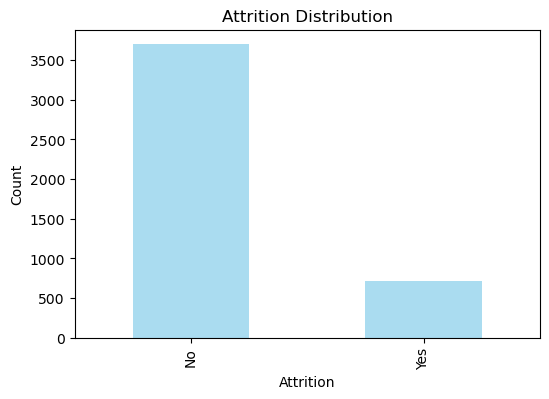

The proportion of employees who have left (attrited) is: 0.00


In [7]:
# 1. Bar Plot for Attrition
plt.figure(figsize=(6, 4))
data['Attrition'].value_counts().plot(kind='bar', color='skyblue', alpha=0.7)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition Distribution')
plt.show()

# Calculate the proportion of employees who have left (attrited)
proportion_attrited = (data['Attrition'] == 1).mean()

# Display the proportion
print(f"The proportion of employees who have left (attrited) is: {proportion_attrited:.2f}")

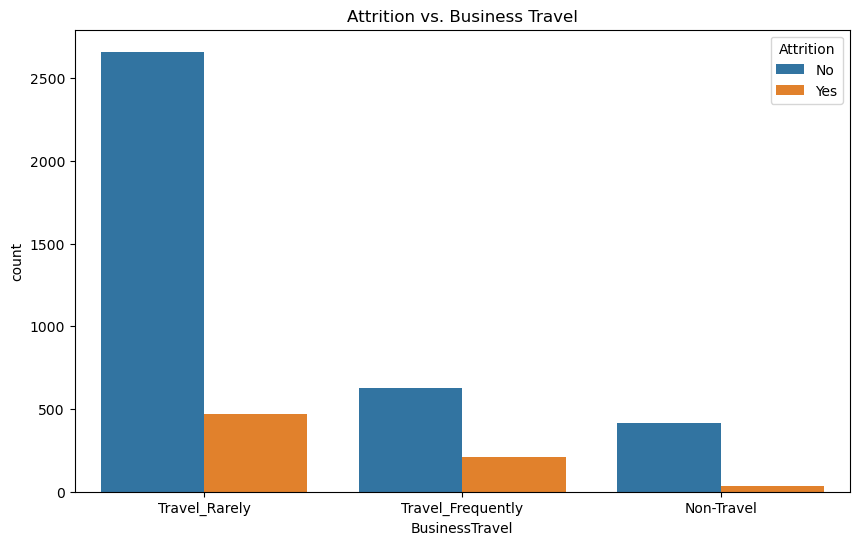

In [8]:
# 2. Are Attrition and travel related
plt.figure(figsize=(10, 6))
sns.countplot(x='BusinessTravel', hue='Attrition', data=data)
plt.title('Attrition vs. Business Travel')
plt.show()

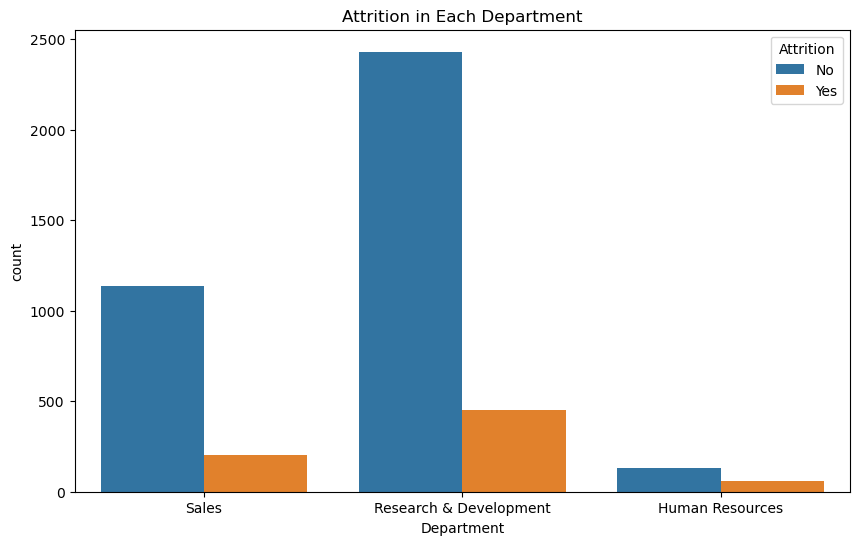

In [9]:
# 3. Maximum attrition in which department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title('Attrition in Each Department')
plt.show()

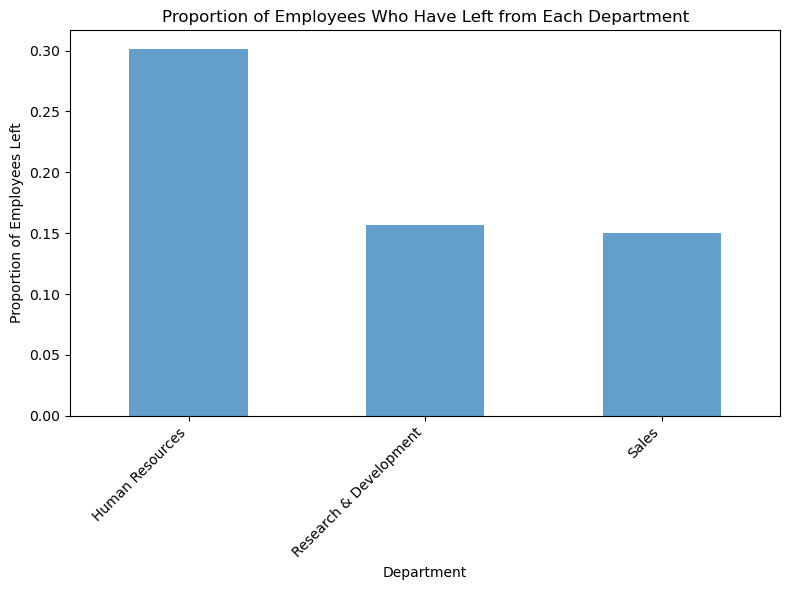

In [10]:
# Calculate the proportion of employees who have left from each department, including 'Unknown' category
proportion_left = data.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').mean())

# Create a bar plot to visualize the proportions
plt.figure(figsize=(8, 6))
proportion_left.plot(kind='bar', alpha=0.7)
plt.xlabel('Department')
plt.ylabel('Proportion of Employees Left')
plt.title('Proportion of Employees Who Have Left from Each Department')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


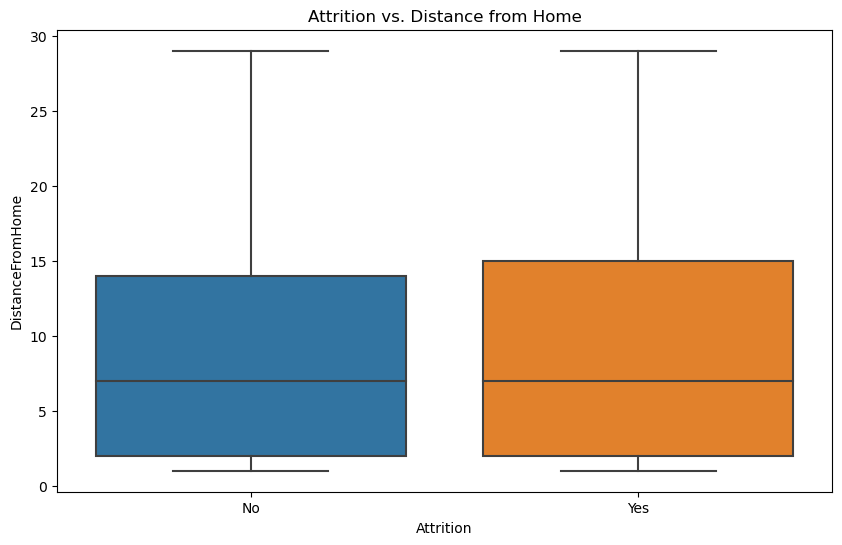

In [11]:
# 4. Attrition and distance from home
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=data)
plt.title('Attrition vs. Distance from Home')
plt.show()

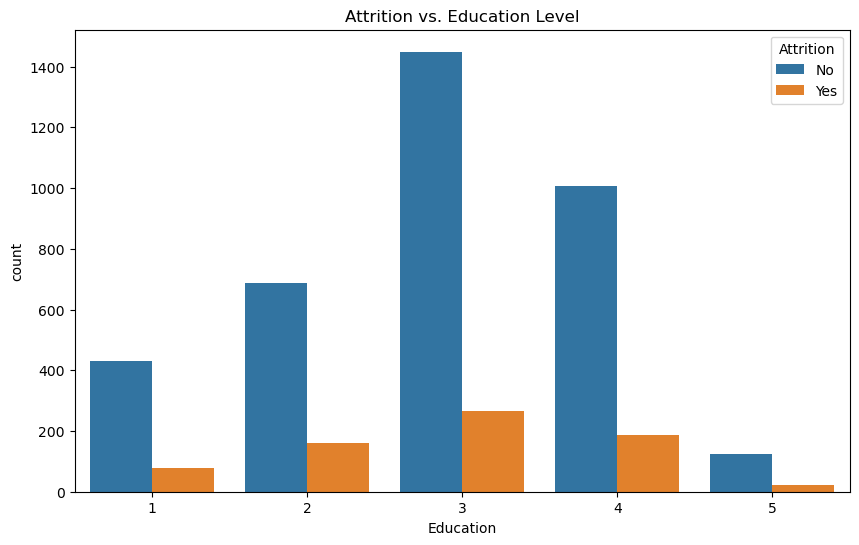

In [12]:
# 5. Attrition and education level
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Attrition', data=data)
plt.title('Attrition vs. Education Level')
plt.show()

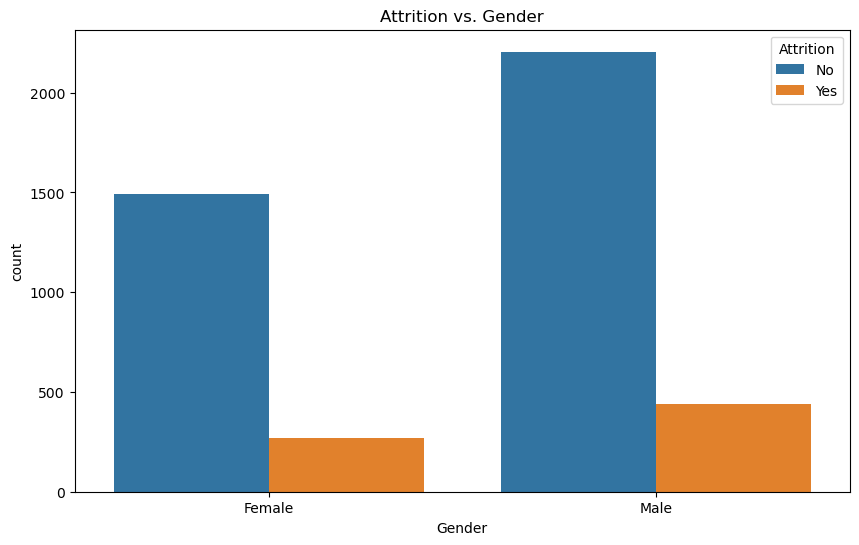

In [13]:
# 6. Attrition and gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Attrition', data=data)
plt.title('Attrition vs. Gender')
plt.show()

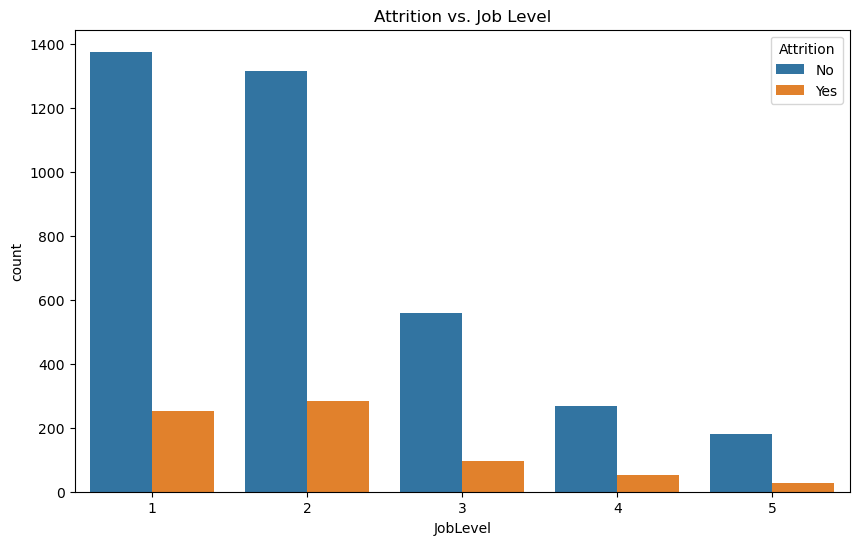

In [14]:
# 7. Attrition and job level
plt.figure(figsize=(10, 6))
sns.countplot(x='JobLevel', hue='Attrition', data=data)
plt.title('Attrition vs. Job Level')
plt.show()

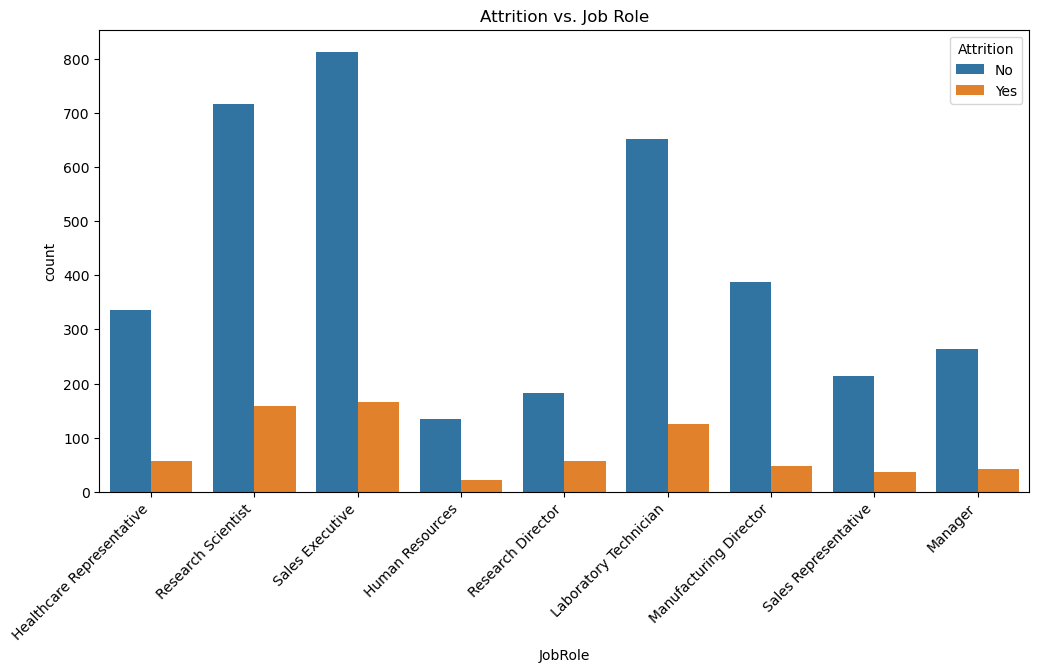

In [15]:
# 8. Attrition and job role
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', hue='Attrition', data=data)
plt.xticks(rotation=45, ha='right')
plt.title('Attrition vs. Job Role')
plt.show()

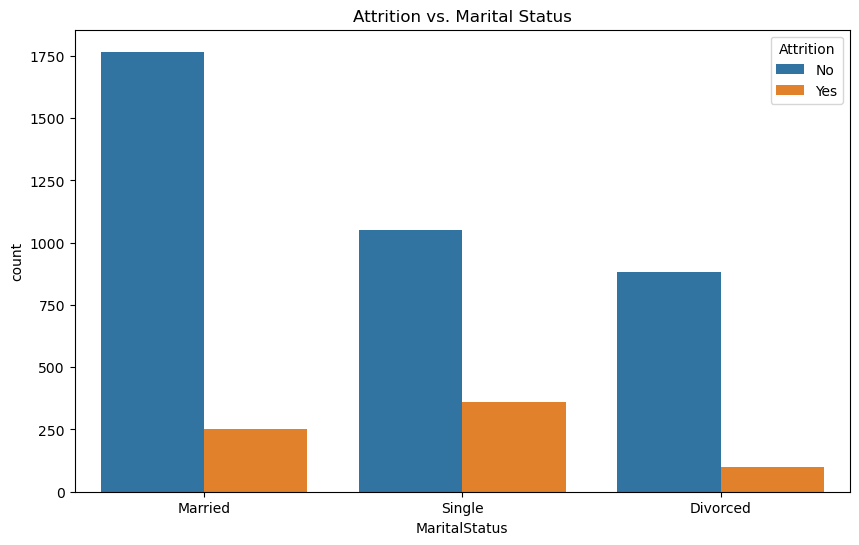

In [16]:
# 9. Attrition and marital status
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=data)
plt.title('Attrition vs. Marital Status')
plt.show()

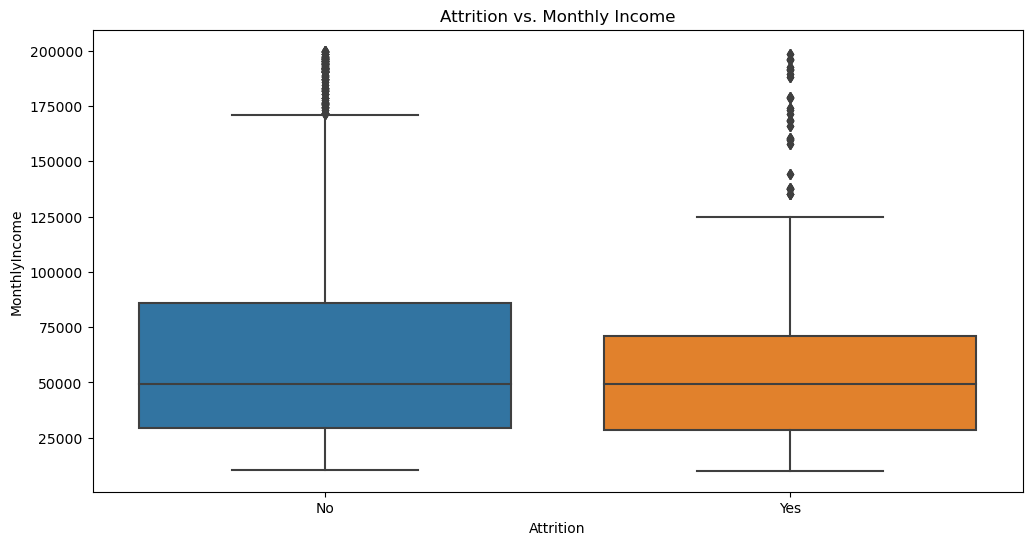

In [17]:
# 10. Attrition and monthly income
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title('Attrition vs. Monthly Income')
plt.show()

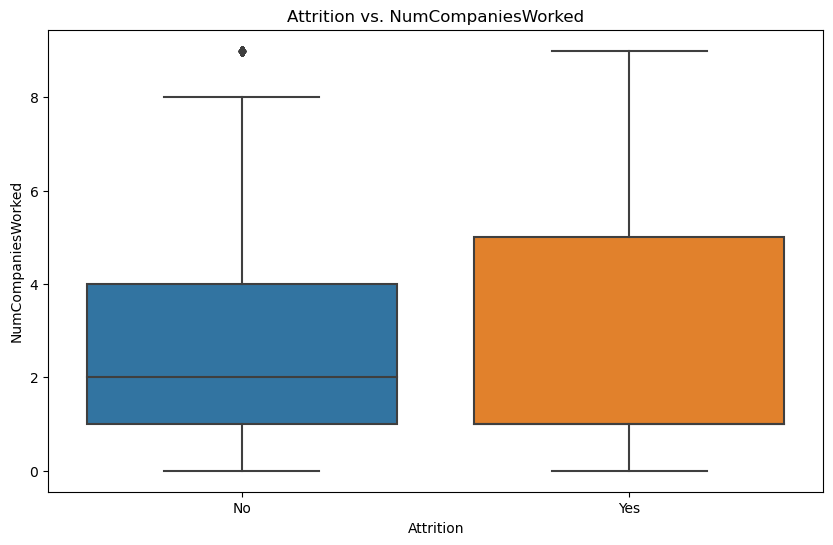

In [18]:
# 11. Attrition and NumCompaniesWorked
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='NumCompaniesWorked', data=data)
plt.title('Attrition vs. NumCompaniesWorked')
plt.show()

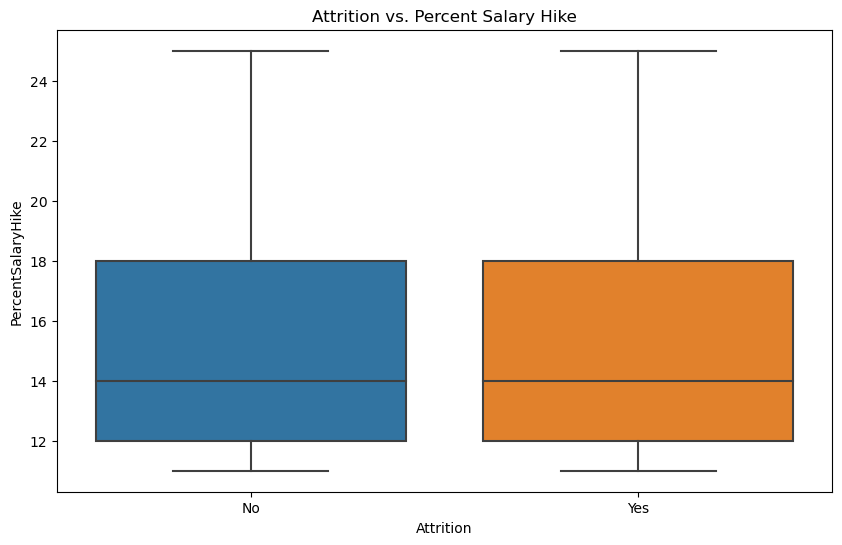

In [19]:
# 12. Attrition and PercentSalaryHike
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='PercentSalaryHike', data=data)
plt.title('Attrition vs. Percent Salary Hike')
plt.show()

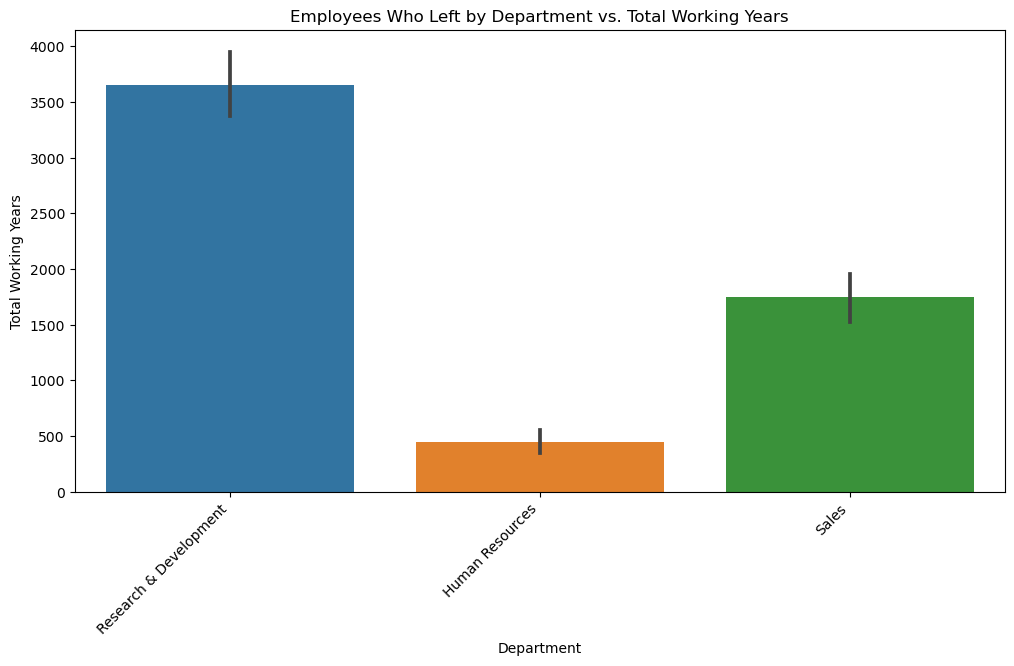

In [20]:
# Filter the data for only those who left (Attrition == 'Yes')
left_employees = data[data['Attrition'] == 'Yes']

14# Group by department and calculate the total standard hours worked by employees who left
left_by_department = left_employees.groupby('Department')['TotalWorkingYears'].sum().reset_index()

# Drop rows with missing values in the 'TotalWorkingYears' column
left_employees = left_employees.dropna(subset=['TotalWorkingYears'])

# Plotting the graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Department', y='TotalWorkingYears', data=left_employees, estimator=sum)
plt.title('Employees Who Left by Department vs. Total Working Years')
plt.xlabel('Department')
plt.ylabel('Total Working Years')
plt.xticks(rotation=45, ha='right')
plt.show()

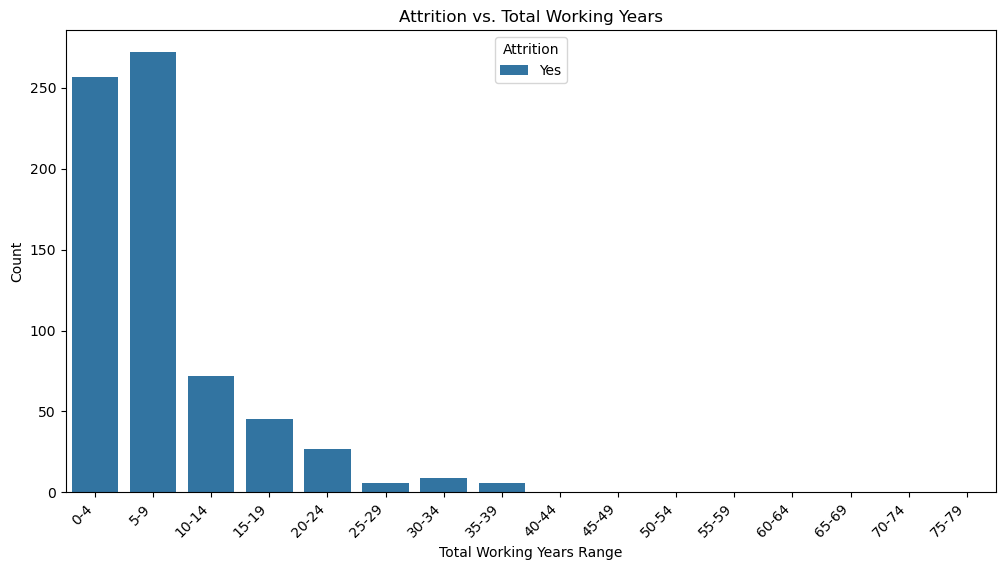

In [21]:
#15 Total years worked versus attrition

# Create bins or ranges for the total working years
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
labels = [f'{i}-{i + 4}' for i in bins[:-1]]

# Categorize the 'TotalWorkingYears' into the bins
left_employees['TotalWorkingYearsRange'] = pd.cut(left_employees['TotalWorkingYears'], bins=bins, labels=labels)

# Plotting the histogram
plt.figure(figsize=(12, 6))
sns.countplot(x='TotalWorkingYearsRange', hue='Attrition', data=left_employees)
plt.title('Attrition vs. Total Working Years')
plt.xlabel('Total Working Years Range')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Running GBM on the dataset

In [22]:
# Convert 'Attrition' column to binary (1 for 'Yes' and 0 for 'No')
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Convert categorical variables into numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include='object').columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Separate features and target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Handling missing values by imputing with mean for numerical columns and most frequent for categorical columns
X = X.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna(x.value_counts().index[0]))

# Handling missing values in the target variable by imputing with the most frequent value
y = y.fillna(y.value_counts().index[0])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Create and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [24]:
# Perform cross-validation with 5 folds
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gb_classifier, X, y, cv=5)

In [25]:
# Calculate the mean accuracy from cross-validation scores
mean_cv_accuracy = cv_scores.mean()

print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

Mean Cross-Validation Accuracy: 0.8984126984126984


In [26]:
# Get feature importances from the trained classifier
importances = gb_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Most Important Features:")
print(feature_importance_df)

Most Important Features:
                    Feature  Importance
0                       Age    0.118049
14        TotalWorkingYears    0.116623
10            MonthlyIncome    0.084048
20          JobSatisfaction    0.065568
16           YearsAtCompany    0.060239
19  EnvironmentSatisfaction    0.059814
9             MaritalStatus    0.056810
11       NumCompaniesWorked    0.055506
18     YearsWithCurrManager    0.055378
3          DistanceFromHome    0.046824
17  YearsSinceLastPromotion    0.043859
1            BusinessTravel    0.041066
12        PercentSalaryHike    0.037767
15    TrainingTimesLastYear    0.031929
8                   JobRole    0.028522
21          WorkLifeBalance    0.023835
5            EducationField    0.020009
2                Department    0.018678
7                  JobLevel    0.011693
13         StockOptionLevel    0.010529
4                 Education    0.007887
6                    Gender    0.005368


In [27]:
# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.891156462585034


# Inferences:

The results show that the Gradient Boosting Classifier achieved a mean cross-validation accuracy of 0.8984 and a test set 
accuracy of 0.8911. This means that the model is able to predict employee attrition with a high degree of accuracy.

The feature importance shows that the most important features for predicting attrition are:

Age
TotalWorkingYears
MonthlyIncome
JobSatisfaction
YearsAtCompany
EnvironmentSatisfaction
MaritalStatus
NumCompaniesWorked
YearsWithCurrManager

These features are all related to the employee's personal life and work experience. This suggests that the most important 
factors in predicting attrition are the employee's overall satisfaction with their job and their life outside of work.

The other features in the dataset also have some importance, but to a lesser extent. These features may also be helpful in 
predicting attrition, but they are not as important as the top 10 features.

Overall, the results show that the Gradient Boosting Classifier is a good model for predicting employee attrition.
The feature importances can be used to understand the factors that are most important in predicting attrition, which can help 
this company to identify employees who are at risk of leaving.

 

In [28]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the precision and recall scores
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8636363636363636
Recall: 0.36538461538461536


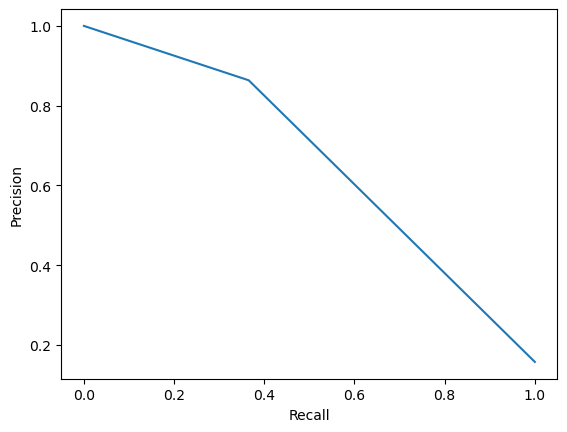

In [29]:
from sklearn.metrics import precision_recall_curve

# Calculate the precision and recall scores
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

[[1103   12]
 [ 132   76]]


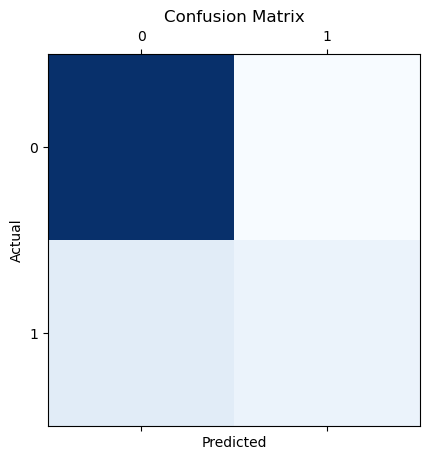

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

# Plot the confusion matrix
plt.matshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV

# Create a dictionary of hyperparameters to try
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [300, 1000],
    'max_depth': [3, 5, 7],
}

# Create a grid search object
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='recall',
)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

# Print the best recall score
print(grid_search.best_score_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}
0.8687722772277228


In [35]:
# Create a GradientBoostingClassifier object with alternate parameters
gb_classifier = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=200,
    max_depth=5,
    random_state=42,
)

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Calculate the precision score
precision = precision_score(y_test, y_pred)

# Print the recall and precision scores
print("Recall:", recall)
print("Precision:", precision)

Recall: 0.75
Precision: 0.9629629629629629


In [36]:
# Create a GradientBoostingClassifier object with the best parameters
gb_classifier = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=5,
    random_state=42,
)

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Calculate the precision score
precision = precision_score(y_test, y_pred)

# Print the recall and precision scores
print("Recall:", recall)
print("Precision:", precision)

Recall: 0.8942307692307693
Precision: 0.9393939393939394
